In [1]:
%matplotlib inline

import pandas as pd
import watexr_forecast as wx
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter('ignore')

# WATExR: Seasonal forecast workflow

## 1. Period of interest

Specify the year and season of interest in the cell below.

In [2]:
# Year of interest
year = 2000

# Season of interest. Choose from:
# ['winter', 'spring', 'early_summer', 'late_summer']
season = 'spring'

# Path to historic (EWEMBI) dataset for 1981 - 2010
ewembi_path = r'../../Data/Meteorological/01_ewembi_obs/ewembi_obs_1981-2010.dat'

# CSV to create summarising EWEMBI quantiles (optional - see Section 3)
quant_path = r'../../Data/Meteorological/01_ewembi_obs/ewembi_obs_quantiles_1981-2010.csv'

## 2. Get seasonal forecast 

Download and bias-correct (without cross-validation) the 15-member seasonal forecast for the specificed year and season.

**Note:** Takes several minutes to complete.

In [3]:
#%%time
#res = wx.get_seasonal_forecast(year, season)

## 3. (Re-)Calculate historic EWEMBI quantiles (optional)

**Note:** This cell only needs to be re-run if the EWEMBI dataset is changed or updated.

In [4]:
# Summarise EWEMBI data
wx.calculate_ewembi_quantiles(ewembi_path, 
                              quant_path, 
                              quants=[0.05, 0.33, 0.67, 0.95],
                              names=['date', 'time', 'uas', 'vas', 'ps', 'tas', 'pr', 'hurs', 'petH'],
                             )

## 4. Aggregate seasonal forecast data

In [5]:
s4_df = wx.aggregate_seasonal_forecast(season, 
                                       par_list=['tas', 'pr', 'wind'],
                                       names=['date', 'time', 'uas', 'vas', 'ps', 'tas', 'pr', 'hurs', 'petH'],
                                      )
s4_df

,tas,pr,wind
member,,,
01,-0.041890,2.219180,2.841993
02,3.868580,2.301571,3.437018
03,1.964248,2.539741,3.299554
04,3.015373,1.142011,3.416503
05,0.730747,1.948192,2.872380
06,2.641572,0.994982,2.892356
07,2.417041,2.103120,2.913799
08,3.925111,1.940949,3.313710
09,2.283365,2.274356,2.628727


## 5. Compare S4 forecast to historic EWEMBI quantiles

Classifies the S4 forecast for this season as "Extreme low", "Below normal", " Near normal", "Above normal" or "Extreme high", based on historic EWEMBI quantiles.

In [6]:
res_dict = wx.compare_s4_to_ewembi(quant_path, 
                                   season, 
                                   s4_df, 
                                   par_list=['tas', 'pr', 'wind'],
                                   normal_quants=[0.33, 0.67], 
                                   extreme_quants=[0.05, 0.95],
                                  )

res_dict

{'tas': {'tercile': 'Above normal',
  'tercile_prob': 66.66666666666667,
  'extreme': 'Not extreme',
  'extreme_prob': 66.66666666666667},
 'pr': {'tercile': 'Near normal',
  'tercile_prob': 60.0,
  'extreme': 'Not extreme',
  'extreme_prob': 100.0},
 'wind': {'tercile': 'Above normal',
  'tercile_prob': 53.333333333333336,
  'extreme': 'Not extreme',
  'extreme_prob': 100.0}}

## 6. Make forecast PNG

**Note:** The forecast reliability score for "wind" is currently based on the ROCSS score for `uas` **only**. Need to fix this.

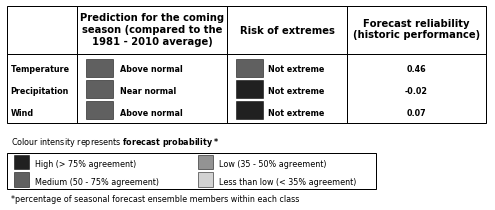

In [7]:
# Read table of historic performance
xl_path = r'../../Data/Meteorological/04_tercile_plots/seasonal_forecast_performance_1981-2010.xlsx'
perf_df = pd.read_excel(xl_path)

# Make summary image
forecast_png = r'forecast_output/climate_forecast_summary.png'
wx.make_climate_forecast_png(season, res_dict, perf_df, forecast_png)

## 7. Make forecast PDF

In [8]:
wx.make_forecast_pdf(year, season)